In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV original
file_path = '../CVD_cleaned.csv'  # Nome do arquivo original
data = pd.read_csv(file_path)

# Selecionar apenas as colunas numéricas para o DBScan
numerical_columns = [
    "Height_(cm)", "Weight_(kg)", "BMI", 
    "Alcohol_Consumption", "Fruit_Consumption", 
    "Green_Vegetables_Consumption", "FriedPotato_Consumption"
]

# Normalizar os dados usando MinMaxScaler
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Aplicar o algoritmo DBScan
eps = 0.5  # Distância máxima entre pontos para serem considerados no mesmo cluster
min_samples = 5  # Mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numerical_columns])

# Visualizar os resultados
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data[numerical_columns[0]],  # Exemplo: primeira variável
    y=data[numerical_columns[1]],  # Exemplo: segunda variável
    hue=data['Cluster'],
    palette="viridis",
    legend="full"
)
plt.title("DBScan Clustering Results")
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Salvar o dataset com os clusters
output_path = 'CVD_DBScan_Clusters.csv'
data.to_csv(output_path, index=False)


KeyboardInterrupt: 

Número de clusters encontrados (excluindo ruído): 12


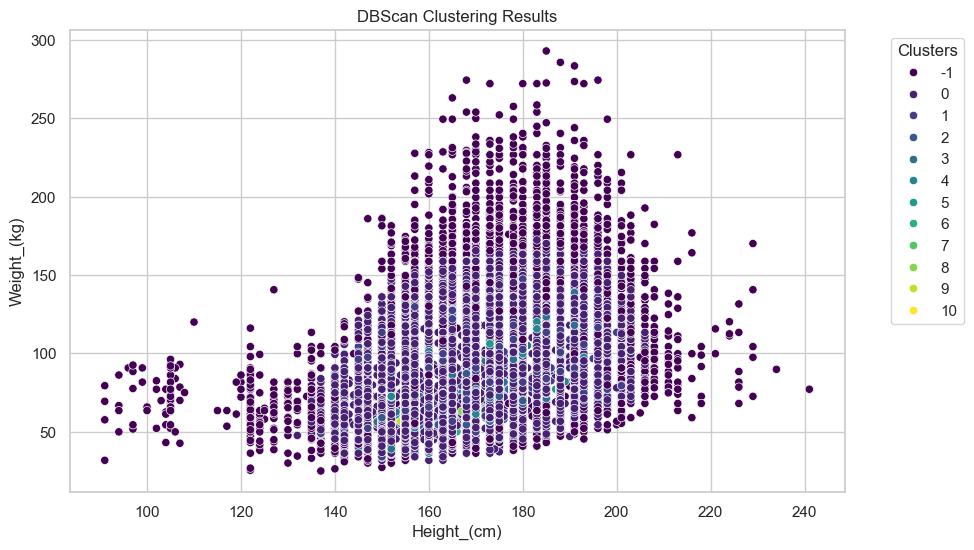

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV original
file_path = '../CVD_cleaned.csv'  # Nome do arquivo original
data = pd.read_csv(file_path)

# Selecionar apenas as colunas numéricas para o DBScan
numerical_columns = [
    "Height_(cm)", "Weight_(kg)", "BMI", 
    "Alcohol_Consumption", "Fruit_Consumption", 
    "Green_Vegetables_Consumption", "FriedPotato_Consumption"
]

# Ajustar os parâmetros do DBScan para formar entre 3 e 5 clusters
eps = 10.0  # Distância máxima entre pontos para serem considerados no mesmo cluster
min_samples = 50  # Mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numerical_columns])

# Verificar número de clusters encontrados (excluindo pontos de ruído)
num_clusters = len(set(data['Cluster'])) - (1 if -1 in data['Cluster'] else 0)
print(f"Número de clusters encontrados (excluindo ruído): {num_clusters}")

# Visualizar os clusters usando as duas primeiras colunas numéricas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data[numerical_columns[0]],  # Primeira variável
    y=data[numerical_columns[1]],  # Segunda variável
    hue=data['Cluster'],
    palette="viridis",
    legend="full"
)
plt.title("DBScan Clustering Results")
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Número de clusters encontrados (excluindo ruído): 34


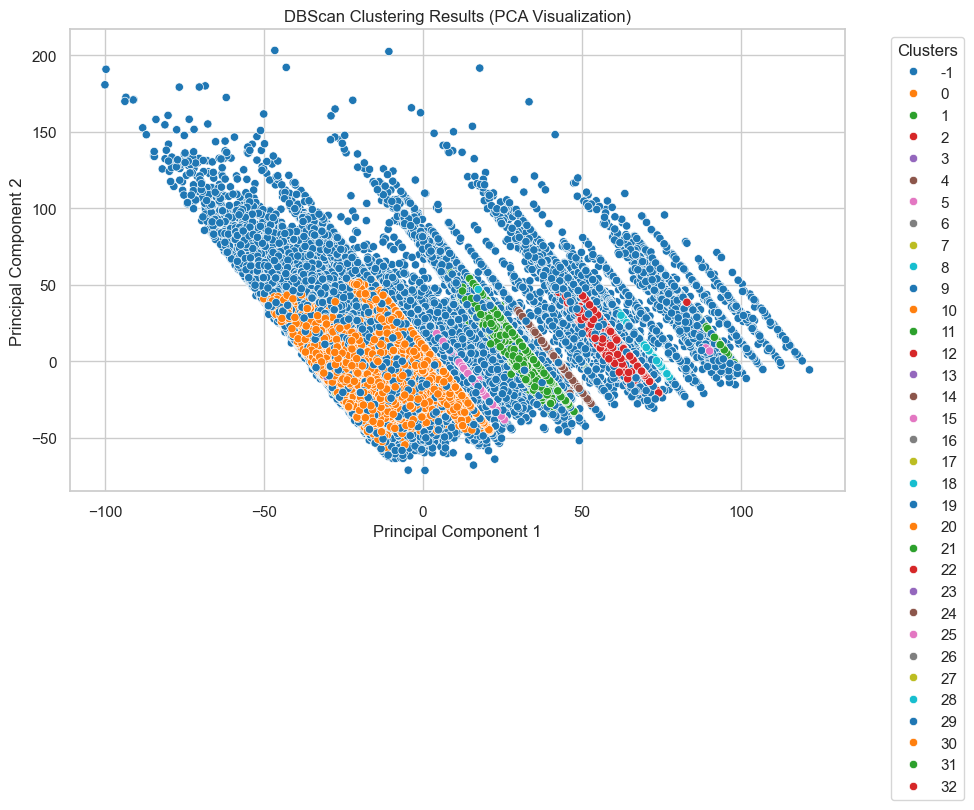

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV original
file_path = '../CVD_cleaned.csv'  # Nome do arquivo original
data = pd.read_csv(file_path)

# Selecionar apenas as colunas numéricas para o DBScan
numerical_columns = [
    "Height_(cm)", "Weight_(kg)", "BMI", 
    "Alcohol_Consumption", "Fruit_Consumption", 
    "Green_Vegetables_Consumption", "FriedPotato_Consumption"
]

# Reduzir dimensionalidade com PCA para visualização
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[numerical_columns])

# Aplicar o algoritmo DBScan
eps = 5.0  # Distância máxima entre pontos para serem considerados no mesmo cluster
min_samples = 20  # Mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numerical_columns])

# Verificar número de clusters encontrados (excluindo pontos de ruído)
num_clusters = len(set(data['Cluster'])) - (1 if -1 in data['Cluster'] else 0)
print(f"Número de clusters encontrados (excluindo ruído): {num_clusters}")

# Criar um DataFrame para visualização com os componentes principais
visualization_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = data['Cluster']

# Visualizar os clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=visualization_df['PCA1'],
    y=visualization_df['PCA2'],
    hue=visualization_df['Cluster'],
    palette="tab10",
    legend="full"
)
plt.title("DBScan Clustering Results (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
